In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [71]:
pd.set_option('display.max_columns',None)
df= pd.read_csv('fifa.csv')
df.head()

/var/folders/n3/wq3qj7vn3c12xjhrsq0nrmcr0000gn/T/ipykernel_6111/2792807005.py:2: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('fifa.csv')


,ID,Name,LongName,photoUrl,playerUrl,Nationality,Age,↓OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Lionel Messi,https://cdn.sofifa.com/players/158/023/21_60.png,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,https://cdn.sofifa.com/players/020/801/21_60.png,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Jan Oblak,https://cdn.sofifa.com/players/200/389/21_60.png,http://sofifa.com/player/200389/jan-oblak/210006/,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Kevin De Bruyne,https://cdn.sofifa.com/players/192/985/21_60.png,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Neymar da Silva Santos Jr.,https://cdn.sofifa.com/players/190/871/21_60.png,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [11]:
df.shape

(18979, 77)

In [3]:
#there are some missing values in Loan Date End and  Hits column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                18979 non-null  int64 
 1   Name              18979 non-null  object
 2   LongName          18979 non-null  object
 3   photoUrl          18979 non-null  object
 4   playerUrl         18979 non-null  object
 5   Nationality       18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Club              18979 non-null  object
 10  Contract          18979 non-null  object
 11  Positions         18979 non-null  object
 12  Height            18979 non-null  object
 13  Weight            18979 non-null  object
 14  Preferred Foot    18979 non-null  object
 15  BOV               18979 non-null  int64 
 16  Best Position     18979 non-null  object
 17  Joined      

#                                           DATA CLEANING



# --------------------List of data cleaning task performe-----------
1. Removing some unnesecary Columns--- LongName, photoUrl and playerUrl 
2. Removing some unnesecary values \n\n\ from Club Column
2. Removing cm from value and converting inch and feet values to cm to make sure all values is in cm  and change the data type to int
3. Removing Kg and lbs from value and converting lbs to Kg from Weight Column and it data type to int
4. Removing M and K from value and converting K  to M from Value Column and it data type to float
5. Removing K and € from value and converting K  to M from Wage Column and it data type to float
6. Removing K and € from value and converting K  to M from Release_Clause Column and it data type to float
7. Removing '★' from W_F, SM, IR Columns
8. Converting Joined, Loan Date ENd column to DATA data type
9. Spliting Contract  column to Start_Date and End_Date
10. Creating contract len column

In [72]:
#removing irrelevant columns
df= df.drop(columns={'LongName', 'photoUrl' , 'playerUrl'})

In [73]:
#changing column name
df= df.rename(columns={'↓OVA':'OVA'})

In [6]:
df.head()

,ID,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,\n\n\n\nFC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,\n\n\n\nJuventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,\n\n\n\nAtlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,\n\n\n\nManchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,\n\n\n\nParis Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [74]:
#fixing Club names
df['Club'].unique()

array(['\n\n\n\nFC Barcelona', '\n\n\n\nJuventus',
       '\n\n\n\nAtlético Madrid', '\n\n\n\nManchester City',
       '\n\n\n\nParis Saint-Germain', '\n\n\n\nFC Bayern München',
       '\n\n\n\nLiverpool', '\n\n\n\nReal Madrid', '\n\n\n\nChelsea',
       '\n\n\n\nTottenham Hotspur', '\n\n\n\nInter', '\n\n\n\nNapoli',
       '\n\n\n\nBorussia Dortmund', '\n\n\n\nManchester United',
       '\n\n\n\nArsenal', '\n\n\n\nLazio', '\n\n\n\nLeicester City',
       '\n\n\n\nBorussia Mönchengladbach', '\n\n\n\nReal Sociedad',
       '\n\n\n\nAtalanta', '\n\n\n\nOlympique Lyonnais', '\n\n\n\nMilan',
       '\n\n\n\nVillarreal CF', '\n\n\n\nRB Leipzig', '\n\n\n\nCagliari',
       '\n\n\n\nAjax', '\n\n\n\nSL Benfica', '\n\n\n\nAS Monaco',
       '\n\n\n\nWolverhampton Wanderers', '\n\n\n\nEverton',
       '\n\n\n\nFiorentina', '\n\n\n\nFC Porto', '\n\n\n\nRC Celta',
       '\n\n\n\nTorino', '\n\n\n\nSevilla FC', '\n\n\n\nGrêmio',
       '\n\n\n\nReal Betis', '\n\n\n\nRoma', '\n\n\n\nNewcastle Unite

In [75]:
df['Club']= df['Club'].str.strip('\n')

In [76]:
df.head()

,ID,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,01-Jul-04,NaN,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,10-Jul-18,NaN,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,16-Jul-14,NaN,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,30-Aug-15,NaN,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,03-Aug-17,NaN,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [77]:
df['Loan Date End']=pd.to_datetime(df['Loan Date End'])
df['Loan Date End']=df['Loan Date End'].dt.date

In [78]:
df['Joined']=pd.to_datetime(df['Joined'])
df['Joined']=df['Joined'].dt.date

In [79]:
df.head()

,ID,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Height,Weight,Preferred Foot,BOV,Best Position,Joined,Loan Date End,Value,Wage,Release Clause,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170cm,72kg,Left,93,RW,2004-07-01,NaT,€103.5M,€560K,€138.4M,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187cm,83kg,Right,92,ST,2018-07-10,NaT,€63M,€220K,€75.9M,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188cm,87kg,Right,91,GK,2014-07-16,NaT,€120M,€125K,€159.4M,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181cm,70kg,Right,91,CAM,2015-08-30,NaT,€129M,€370K,€161M,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175cm,68kg,Right,91,LW,2017-08-03,NaT,€132M,€270K,€166.5M,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [80]:
def height(height):
    if 'cm' in height:
        return int(height.strip('cm'))
    else:
        feet, inch= height.split("'")
        t = int(feet)*12 + int(inch.strip('"'))
        return round(t*2.54)
                                
                                  

In [81]:
df['Height']= df['Height'].apply(height)

In [82]:
df.rename(columns={'Height':'Heights(cm)'},inplace=True)

In [83]:
df['Weight'].unique()

array(['72kg', '83kg', '87kg', '70kg', '68kg', '80kg', '71kg', '91kg',
       '73kg', '85kg', '92kg', '69kg', '84kg', '96kg', '81kg', '82kg',
       '75kg', '86kg', '89kg', '74kg', '76kg', '64kg', '78kg', '90kg',
       '66kg', '60kg', '94kg', '79kg', '67kg', '65kg', '59kg', '61kg',
       '93kg', '88kg', '97kg', '77kg', '62kg', '63kg', '95kg', '100kg',
       '58kg', '183lbs', '179lbs', '172lbs', '196lbs', '176lbs', '185lbs',
       '170lbs', '203lbs', '168lbs', '161lbs', '146lbs', '130lbs',
       '190lbs', '174lbs', '148lbs', '165lbs', '159lbs', '192lbs',
       '181lbs', '139lbs', '154lbs', '157lbs', '163lbs', '98kg', '103kg',
       '99kg', '102kg', '56kg', '101kg', '57kg', '55kg', '104kg', '107kg',
       '110kg', '53kg', '50kg', '54kg', '52kg'], dtype=object)

In [84]:
def weight(weight):
    if 'kg' in weight:
        return int(weight.strip('kg'))
    else:
        if 'lbs' in weight:
            weight_kg= int(weight.strip('lbs'))
            return round(weight_kg* .454)
             


In [85]:
df['Weight']= df['Weight'].apply(weight)

In [86]:
df.rename(columns={'Weight':'Weight(Kg)'},inplace=True)

In [87]:
df['Value'].unique()

array(['€103.5M', '€63M', '€120M', '€129M', '€132M', '€111M', '€120.5M',
       '€102M', '€185.5M', '€110M', '€113M', '€90.5M', '€82M', '€17.5M',
       '€83.5M', '€33.5M', '€114.5M', '€78M', '€103M', '€109M', '€92M',
       '€10M', '€76.5M', '€89.5M', '€87.5M', '€79.5M', '€124M', '€114M',
       '€95M', '€92.5M', '€105.5M', '€88.5M', '€85M', '€81.5M', '€26M',
       '€21M', '€56M', '€67.5M', '€53M', '€36.5M', '€51M', '€65.5M',
       '€46.5M', '€61.5M', '€72.5M', '€77.5M', '€43.5M', '€32.5M', '€36M',
       '€32M', '€54M', '€49.5M', '€57M', '€66.5M', '€74.5M', '€71.5M',
       '€121M', '€99M', '€67M', '€86.5M', '€93.5M', '€70M', '€62M',
       '€66M', '€58M', '€44M', '€81M', '€37M', '€14.5M', '€46M', '€47.5M',
       '€52.5M', '€54.5M', '€34.5M', '€57.5M', '€51.5M', '€44.5M', '€55M',
       '€48M', '€60.5M', '€63.5M', '€61M', '€29M', '€58.5M', '€55.5M',
       '€42M', '€40.5M', '€43M', '€45.5M', '€34M', '€26.5M', '€42.5M',
       '€35.5M', '€45M', '€41.5M', '€40M', '€11M', '€13.5M', '

In [88]:
def value(value):
    if 'M' in value:
        val_m = float(value.strip('€M'))
        #return round(val_m* 100000)
        #return format(val_m * 100000, '.0f')
        #return format(val_m, '.0f')
        return round(val_m,2)
    
    else:
        if 'K' in value:
            val_k= float(value.strip('€K'))
            #return round(val_k*1000)
            #return format(val_k * 1000, '.0f')
            return round(val_k/1000,2)  #changed
             


In [90]:
df['Value']= df['Value'].apply(value)

In [91]:
df.rename(columns={'Value':'values(€M)'},inplace=True)

In [92]:
df['Wage'].unique()

array(['€560K', '€220K', '€125K', '€370K', '€270K', '€240K', '€250K',
       '€160K', '€260K', '€210K', '€310K', '€130K', '€350K', '€300K',
       '€190K', '€145K', '€195K', '€100K', '€140K', '€290K', '€82K',
       '€110K', '€230K', '€155K', '€200K', '€165K', '€95K', '€170K',
       '€105K', '€115K', '€150K', '€135K', '€55K', '€58K', '€81K', '€34K',
       '€120K', '€59K', '€90K', '€65K', '€56K', '€71K', '€18K', '€75K',
       '€47K', '€20K', '€84K', '€86K', '€74K', '€78K', '€27K', '€68K',
       '€85K', '€25K', '€46K', '€83K', '€54K', '€79K', '€175K', '€43K',
       '€49K', '€45K', '€38K', '€41K', '€39K', '€23K', '€51K', '€50K',
       '€87K', '€30K', '€14K', '€69K', '€31K', '€64K', '€53K', '€35K',
       '€21K', '€28K', '€17K', '€33K', '€70K', '€32K', '€89K', '€26K',
       '€40K', '€76K', '€72K', '€48K', '€36K', '€29K', '€60K', '€16K',
       '€37K', '€24K', '€52K', '€0', '€62K', '€73K', '€63K', '€19K',
       '€1K', '€66K', '€80K', '€12K', '€2K', '€42K', '€13K', '€900',
       '€5

In [93]:
def wage(wage):
    if 'K' in wage:
        val_m = int(wage.strip('€K'))
        return round(val_m/1000,2)
        #return format(val_m, '.2f')
    
    else:
        val_k= int(wage.strip('€'))
        return round(val_k/1000000,2)
        #return format(val_k / 1000, '.2f')
    

In [95]:
df['Wage']= df['Wage'].apply(wage)

In [96]:
df.rename(columns={'Wage':'Wage(€M)'},inplace=True)

In [51]:
df['Release Clause'].unique()

array(['€138.4M', '€75.9M', '€159.4M', ..., '€59K', '€35K', '€64K'],
      dtype=object)

In [98]:
def Clause(Clause):
    if 'M' in Clause:
        val_m = float(Clause.strip('€M'))
        return round(val_m,2)
        #return format(val_m, '.2f')
    
    else:
        val_k= float(Clause.strip('€K'))
        return round(val_k/1000,2)
        #return format(val_k / 1000, '.2f')

In [99]:
df['Release Clause']= df['Release Clause'].apply(Clause)

In [100]:
df.rename(columns={'Release Clause':'Release Clause(€M)'},inplace=True)

In [101]:
df.head()

,ID,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Heights(cm),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,values(€M),Wage(€M),Release Clause(€M),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,NaT,103.5,0.56,138.4,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4 ★,4★,Medium,Low,5 ★,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,2018-07-10,NaT,63.0,0.22,75.9,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4 ★,5★,High,Low,5 ★,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,2014-07-16,NaT,120.0,0.12,159.4,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3 ★,1★,Medium,Medium,3 ★,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaT,129.0,0.37,161.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5 ★,4★,High,High,4 ★,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,2017-08-03,NaT,132.0,0.27,166.5,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5 ★,5★,High,Medium,5 ★,91,85,86,94,36,59,595


In [102]:
df['W/F']= df['W/F'].str.replace('★','')

In [103]:
df['SM']= df['SM'].str.replace('★','')
df['IR']= df['IR'].str.replace('★','')

In [104]:
df['IR'].unique()

array(['5 ', '3 ', '4 ', '2 ', '1 '], dtype=object)

In [105]:
df['W/F']= df['W/F'].str.strip()

In [106]:
df['W/F']= df['W/F'].astype(int)

In [107]:
df['SM']= df['SM'].astype(int)
df['IR']= df['IR'].astype(int)

In [108]:
df.head()

,ID,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Heights(cm),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,values(€M),Wage(€M),Release Clause(€M),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,NaT,103.5,0.56,138.4,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,2018-07-10,NaT,63.0,0.22,75.9,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,2014-07-16,NaT,120.0,0.12,159.4,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaT,129.0,0.37,161.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,2017-08-03,NaT,132.0,0.27,166.5,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595


In [109]:
df['Contract'].unique()

array(['2004 ~ 2021', '2018 ~ 2022', '2014 ~ 2023', '2015 ~ 2023',
       '2017 ~ 2022', '2017 ~ 2023', '2018 ~ 2024', '2014 ~ 2022',
       '2018 ~ 2023', '2016 ~ 2023', '2013 ~ 2023', '2011 ~ 2023',
       '2009 ~ 2022', '2005 ~ 2021', '2011 ~ 2021', '2015 ~ 2022',
       '2017 ~ 2024', '2010 ~ 2024', '2012 ~ 2021', '2019 ~ 2024',
       '2015 ~ 2024', '2017 ~ 2025', '2020 ~ 2025', '2019 ~ 2023',
       '2008 ~ 2023', '2015 ~ 2021', '2020 ~ 2022', '2012 ~ 2022',
       '2016 ~ 2025', '2013 ~ 2022', '2011 ~ 2022', '2012 ~ 2024',
       '2016 ~ 2021', '2012 ~ 2023', '2008 ~ 2022', '2019 ~ 2022',
       '2017 ~ 2021', '2013 ~ 2024', '2020 ~ 2024', '2010 ~ 2022',
       '2020 ~ 2021', '2011 ~ 2024', '2020 ~ 2023', '2014 ~ 2024',
       '2013 ~ 2026', '2016 ~ 2022', '2010 ~ 2021', '2013 ~ 2021',
       '2019 ~ 2025', '2018 ~ 2025', '2016 ~ 2024', '2018 ~ 2021',
       '2009 ~ 2024', '2007 ~ 2022', 'Jun 30, 2021 On Loan',
       '2009 ~ 2021', '2019 ~ 2021', '2019 ~ 2026', 'Free', '2012 ~ 

In [110]:
def contract(contract):
    if contract == 'Free' or 'Loan' in contract:
        start= np.nan
        end= np.nan
        length= 0
        return start,end,length
    else:
        startt,endd= contract.split('~')
        startt= int(startt)
        endd = int(endd)
        lengthh= endd -  startt
        return startt, endd, lengthh
    

In [111]:
new_cols = ['Contract Start', 'Contract End', 'Contract Length (years)']
df[new_cols]= df['Contract'].apply(contract).apply(pd.Series)

In [112]:
df.head()

,ID,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Heights(cm),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,values(€M),Wage(€M),Release Clause(€M),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Start,Contract End,Contract Length (years)
0,158023,L. Messi,Argentina,33,93,93,FC Barcelona,2004 ~ 2021,"RW, ST, CF",170,72,Left,93,RW,2004-07-01,NaT,103.5,0.56,138.4,429,85,95,70,91,88,470,96,93,94,91,96,451,91,80,91,94,95,389,86,68,72,69,94,347,44,40,93,95,75,96,91,32,35,24,54,6,11,15,14,8,2231,466,4,4,Medium,Low,5,85,92,91,95,38,65,771,2004.0,2021.0,17.0
1,20801,Cristiano Ronaldo,Portugal,35,92,92,Juventus,2018 ~ 2022,"ST, LW",187,83,Right,92,ST,2018-07-10,NaT,63.0,0.22,75.9,437,84,95,90,82,86,414,88,81,76,77,92,431,87,91,87,95,71,444,94,95,84,78,93,353,63,29,95,82,84,95,84,28,32,24,58,7,11,15,14,11,2221,464,4,5,High,Low,5,89,93,81,89,35,77,562,2018.0,2022.0,4.0
2,200389,J. Oblak,Slovenia,27,91,93,Atlético Madrid,2014 ~ 2023,GK,188,87,Right,91,GK,2014-07-16,NaT,120.0,0.12,159.4,95,13,11,15,43,13,109,12,13,14,40,30,307,43,60,67,88,49,268,59,78,41,78,12,140,34,19,11,65,11,68,57,27,12,18,437,87,92,78,90,90,1413,489,3,1,Medium,Medium,3,87,92,78,90,52,90,150,2014.0,2023.0,9.0
3,192985,K. De Bruyne,Belgium,29,91,91,Manchester City,2015 ~ 2023,"CAM, CM",181,70,Right,91,CAM,2015-08-30,NaT,129.0,0.37,161.0,407,94,82,55,94,82,441,88,85,83,93,92,398,77,76,78,91,76,408,91,63,89,74,91,408,76,66,88,94,84,91,186,68,65,53,56,15,13,5,10,13,2304,485,5,4,High,High,4,76,86,93,88,64,78,207,2015.0,2023.0,8.0
4,190871,Neymar Jr,Brazil,28,91,91,Paris Saint-Germain,2017 ~ 2022,"LW, CAM",175,68,Right,91,LW,2017-08-03,NaT,132.0,0.27,166.5,408,85,87,62,87,87,448,95,88,89,81,95,453,94,89,96,91,83,357,80,62,81,50,84,356,51,36,87,90,92,93,94,35,30,29,59,9,9,15,15,11,2175,451,5,5,High,Medium,5,91,85,86,94,36,59,595,2017.0,2022.0,5.0


#  EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION

# ----------------------KEY INSIGHTS-----------------


1. Top 10 Nationality With Most Players
2. Top 10 Clubs With Most Players
3. Top 10 Nationality From Which Player Did Not Get A Club
4. Top 10 Players With Highest Wages
5. Top 10 Players With Highest Value 
6. Value vs Wage of The Players
7. Value vs Age of The Players
8. Avg Age of The players of each Clubs
9. Players with Highest overall
10. Position Wise AVG overall
11. All Posotion Wise Best Overall Player
12. Number of Players by Position
13. Player Weight Wise Performance
14. Player Age Wise Performance
15. Player Age Wise Value
16. Preferred Foot Wise Comparision
17. Player Position Wise Comparision
18. Number of Players by Their Age
19. Top 10 Players With Highest Contact Lenght

# 1. Top 10 Nationality With Most Players

In [113]:
a= df['Nationality'].value_counts().to_frame()
a.head(10).style.bar() 

,Nationality
England,1705
Germany,1195
Spain,1065
France,1003
Argentina,943
Brazil,887
Japan,485
Netherlands,438
Italy,387
Sweden,380


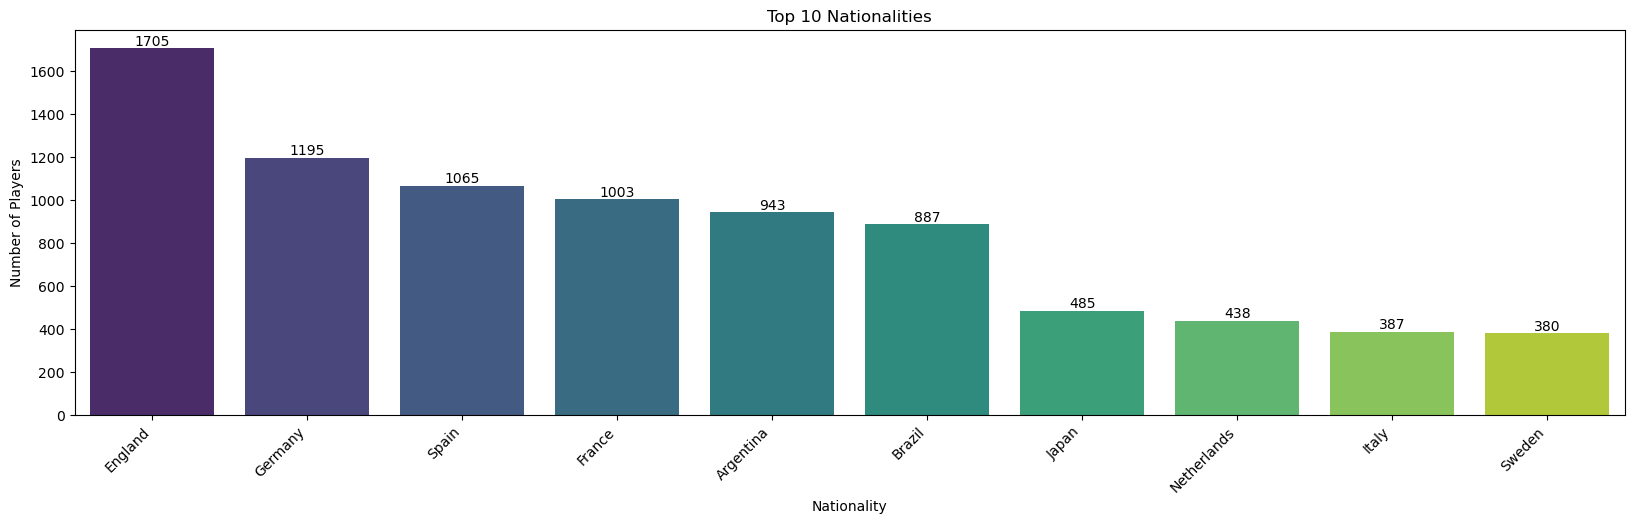

In [114]:
plt.figure(figsize=(20, 5))
sqq= sns.barplot(x=a.index[:10], y='Nationality', data=a.head(10), palette='viridis')
for bars in sqq.containers:
    sqq.bar_label(bars)
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.title('Top 10 Nationalities')
plt.xticks(rotation=45, ha='right')
plt.show()

# 2. Clubs With Most Players


In [115]:
b= df['Club'].value_counts().to_frame()
b.head(10).style.bar() 

,Club
No Club,237
FC Barcelona,33
Burnley,33
RC Celta,33
Torino,33
Cádiz CF,33
Real Betis,33
Newcastle United,33
Valencia CF,33
Racing Club de Lens,33


# 3. Top 10 Nationality From Which Player Did Not Get A Club

In [116]:
no_club=df[df['Club']=='No Club']
no_club.head(2)

,ID,Name,Nationality,Age,OVA,POT,Club,Contract,Positions,Heights(cm),Weight(Kg),Preferred Foot,BOV,Best Position,Joined,Loan Date End,values(€M),Wage(€M),Release Clause(€M),Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,Contract Start,Contract End,Contract Length (years)
289,230347,Welington Dano,Brazil,20,81,81,No Club,Free,"LB, LM",178,69,Left,81,LB,2019-01-01,NaT,NaN,0.0,0.0,327,82,51,69,78,47,361,77,83,52,71,78,402,78,80,83,80,81,336,55,71,89,68,53,354,69,77,72,75,61,82,228,70,77,81,60,16,15,15,7,7,2068,436,4,4,Medium,Medium,1,79,54,76,78,75,74,172,NaN,NaN,0.0
292,230225,Juiano Mestres,Brazil,24,81,81,No Club,Free,"CB, CDM",181,82,Right,81,CB,2019-01-01,NaT,NaN,0.0,0.0,309,40,56,83,67,63,312,60,72,58,58,64,344,68,74,61,78,63,381,74,91,76,79,61,338,86,82,58,50,62,70,246,77,85,84,73,18,12,14,11,18,2003,413,3,2,High,Medium,1,71,61,57,62,82,80,75,NaN,NaN,0.0


In [117]:
ac= no_club['Nationality'].value_counts().to_frame()
ac.head(10).style.bar()

,Nationality
India,29
Ecuador,23
Uruguay,23
Egypt,20
Bulgaria,19
Hungary,14
Russia,13
Bolivia,9
South Africa,9
Slovenia,7


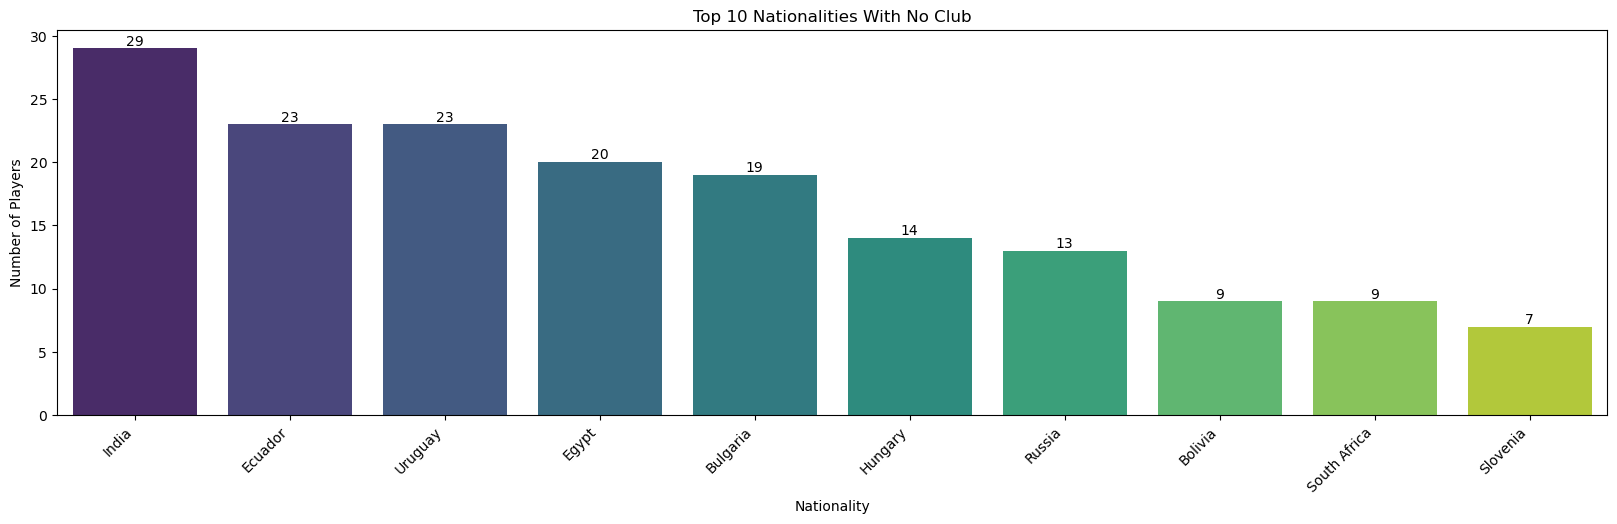

In [118]:
plt.figure(figsize=(20, 5))
sq= sns.barplot(data=ac.head(10), y='Nationality', x= ac.index[:10],palette='viridis' )
for bars in sq.containers:
    sq.bar_label(bars)
    
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.title('Top 10 Nationalities With No Club')
plt.xticks(rotation=45, ha='right')
plt.show()

#  4. Top 10 Players With Highest Wages


In [120]:
df.groupby(['Name'],as_index=False)['Wage(€M)'].max().sort_values(by='Wage(€M)',ascending=False).head()

,Name,Wage(€M)
10118,L. Messi,0.56
9045,K. De Bruyne,0.37
9001,K. Benzema,0.35
4586,E. Hazard,0.35
16432,T. Kroos,0.31


In [121]:
top_ten_names_wage = df.sort_values('Wage(€M)', ascending=False).head(10)[['Name', 'Wage(€M)']]
r= top_ten_names_wage.reset_index() 


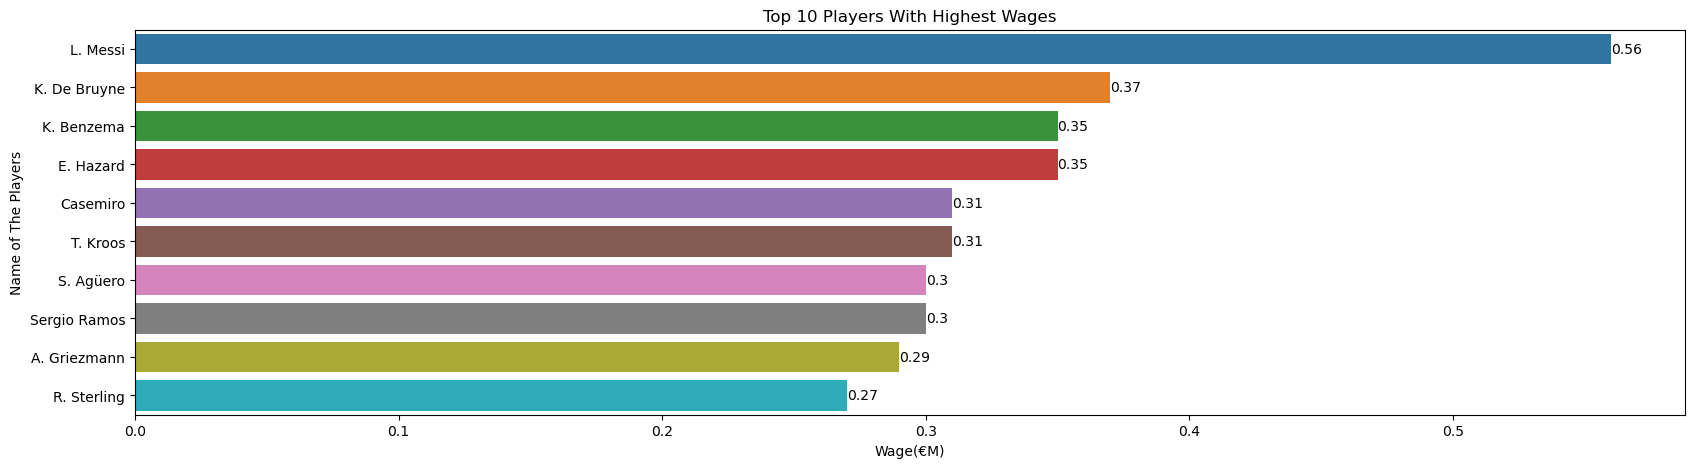

In [122]:
plt.figure(figsize=(20, 5))
ss= sns.barplot(data=top_ten_names_wage,y='Name',x='Wage(€M)' )
for bars in ss.containers:
    ss.bar_label(bars)
plt.ylabel('Name of The Players')
plt.xlabel('Wage(€M)')
plt.title('Top 10 Players With Highest Wages')
#plt.xticks(rotation=45, ha='right')
plt.show()

#  5. Top 10 Players With Highest Value


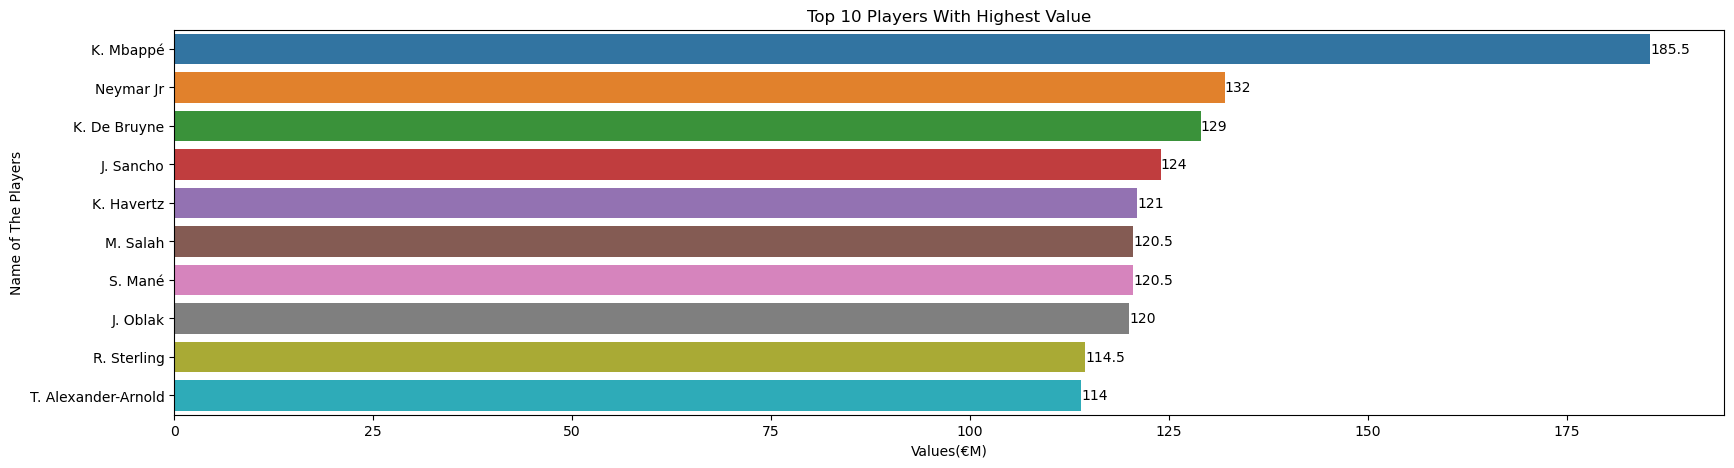

In [123]:
top_ten_names_value = df.sort_values('values(€M)', ascending=False).head(10)[['Name', 'values(€M)']]
plt.figure(figsize=(20, 5))
aaq= sns.barplot(data=top_ten_names_value,y='Name',x='values(€M)' )
for bars in aaq.containers:
    aaq.bar_label(bars)
plt.ylabel('Name of The Players')
plt.xlabel('Values(€M)')
plt.title('Top 10 Players With Highest Value')
#plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Value Vs Wage of The Players

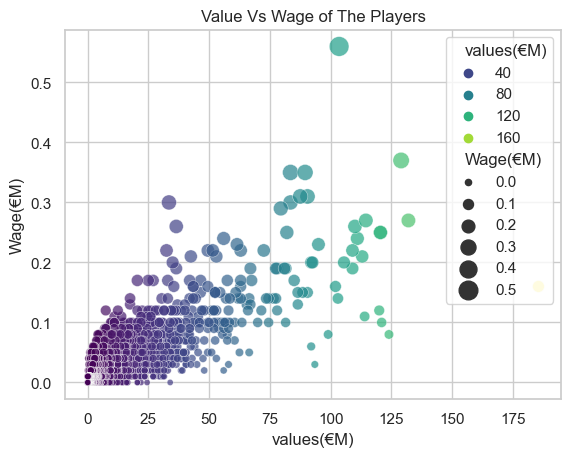

<Figure size 1000x500 with 0 Axes>

In [124]:
sns.set(style="whitegrid")

# Create a scatter plot using seaborn with color differentiation
sns.scatterplot(data=df, x='values(€M)', y='Wage(€M)', hue='values(€M)', palette='viridis', size='Wage(€M)', sizes=(20, 200), alpha=0.7)

# Add labels and title
plt.xlabel('values(€M)')
plt.ylabel('Wage(€M)')
plt.title('Value Vs Wage of The Players')

# Set the figure size
plt.figure(figsize=(10, 5))

# Display the plot
plt.show()

# 7. Value Vs Age of The Players

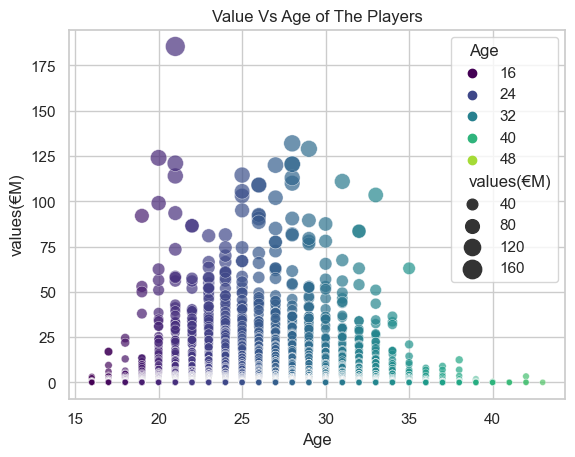

<Figure size 1000x500 with 0 Axes>

In [125]:
sns.set(style="whitegrid")

# Create a scatter plot using seaborn with color based on 'Age' and 'values(M)€'
sns.scatterplot(data=df, y='values(€M)', x='Age', hue='Age', palette='viridis', size='values(€M)', sizes=(20, 200), alpha=0.7)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('values(€M)')
plt.title('Value Vs Age of The Players')

# Set the figure size
plt.figure(figsize=(10, 5))

# Display the plot
plt.show()

# 8. Avg Age of The players of each Clubs

In [126]:
df.groupby(['Club'],as_index=False)['Age'].mean().sort_values(by='Age',ascending= False).head(10)


,Club,Age
472,Qingdao Huanghai F.C.,29.360000
423,No Club,29.316456
36,Al Fayha,29.200000
559,Shanghai Greenland Shenhua FC,29.115385
10,AC Mineros de Guayana,29.040000
675,Yokohama FC,29.033333
570,Sivasspor,29.000000
70,BB Erzurumspor,28.923077
337,Jorge Wilstermann,28.800000
671,Wuhan Zall,28.571429


In [127]:
# Calculate the average age for each club
club_avg_age = df.groupby('Club')['Age'].mean().reset_index()

# Sort the clubs based on average age in descending order
top_10_clubs = club_avg_age.sort_values('Age', ascending=False).head(10)['Club']

# Filter the DataFrame for the top 10 clubs
df_top_10 = df[df['Club'].isin(top_10_clubs)]



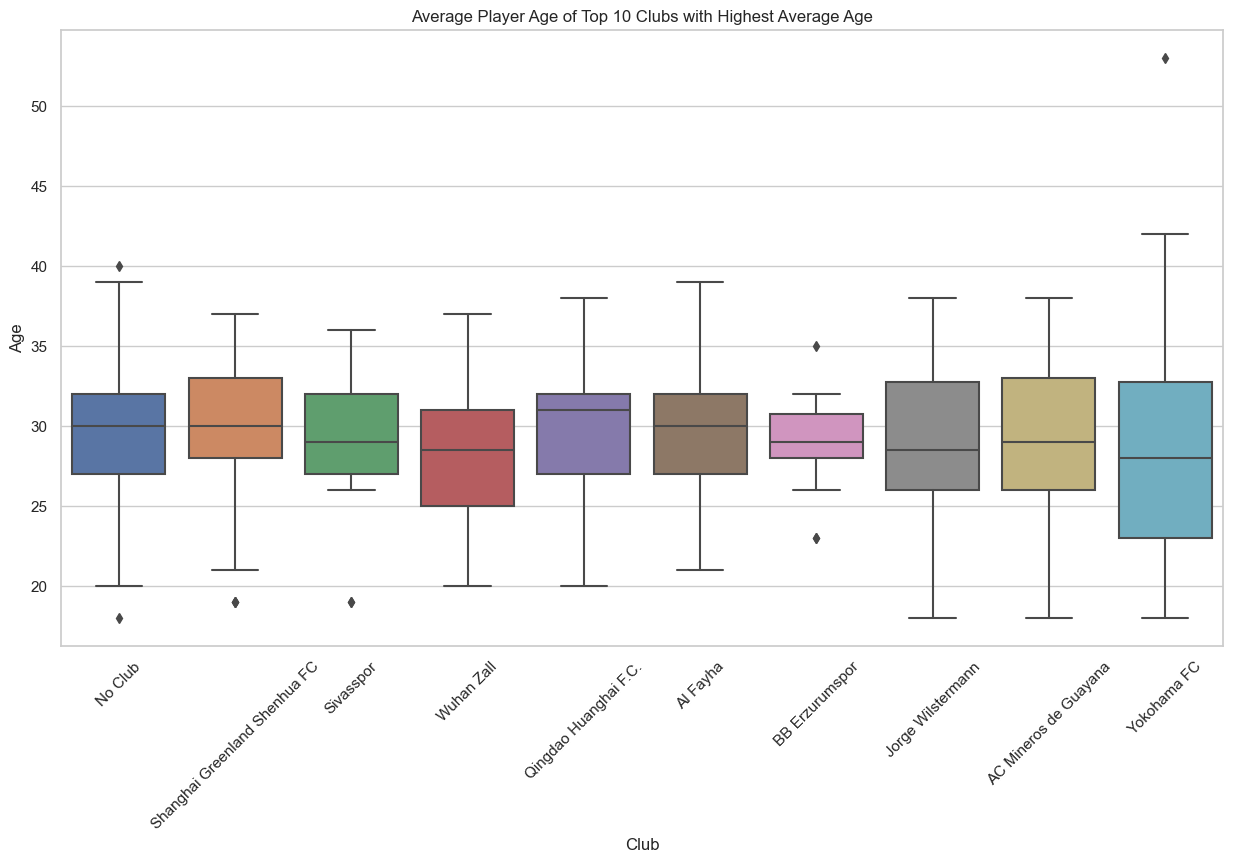

In [128]:
# Set the figure size
plt.figure(figsize=(15, 8))

# Create a boxplot using seaborn
sns.boxplot(x='Club', y='Age', data=df_top_10)

# Add labels and title
plt.xlabel('Club')
plt.ylabel('Age')
plt.title('Average Player Age of Top 10 Clubs with Highest Average Age')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

# 9. Player Highest overall


In [129]:
df.sort_values('OVA',ascending= False).head(10)[['Name', 'OVA']]

,Name,OVA
0,L. Messi,93
1,Cristiano Ronaldo,92
2,J. Oblak,91
3,K. De Bruyne,91
4,Neymar Jr,91
5,R. Lewandowski,91
9,M. ter Stegen,90
10,V. van Dijk,90
11,S. Mané,90
8,K. Mbappé,90


# 10. Position Wise AVG overall

In [176]:
df.groupby(['Best Position'], as_index=False)['OVA'].mean().sort_values(by='OVA', ascending= False)

,Best Position,OVA
3,CF,71.269231
8,LW,68.333333
12,RW,67.795302
4,CM,67.229226
2,CDM,66.954325
13,RWB,66.689531
9,LWB,66.616858
10,RB,66.569972
6,LB,66.284530
7,LM,66.219288


# 11. All Posotion Wise Best Overall Player

In [189]:
best_players = df.sort_values('OVA', ascending=False).groupby('Best Position').first()[['Name', 'OVA']]
best_players_sort= best_players.sort_values('OVA', ascending=False)
a= best_players_sort.reset_index()
a

,Best Position,Name,OVA
0,RW,L. Messi,93
1,ST,Cristiano Ronaldo,92
2,CAM,K. De Bruyne,91
3,GK,J. Oblak,91
4,LW,Neymar Jr,91
5,CB,V. van Dijk,90
6,CDM,Casemiro,89
7,CF,K. Benzema,89
8,CM,T. Kroos,88
9,LB,A. Robertson,87


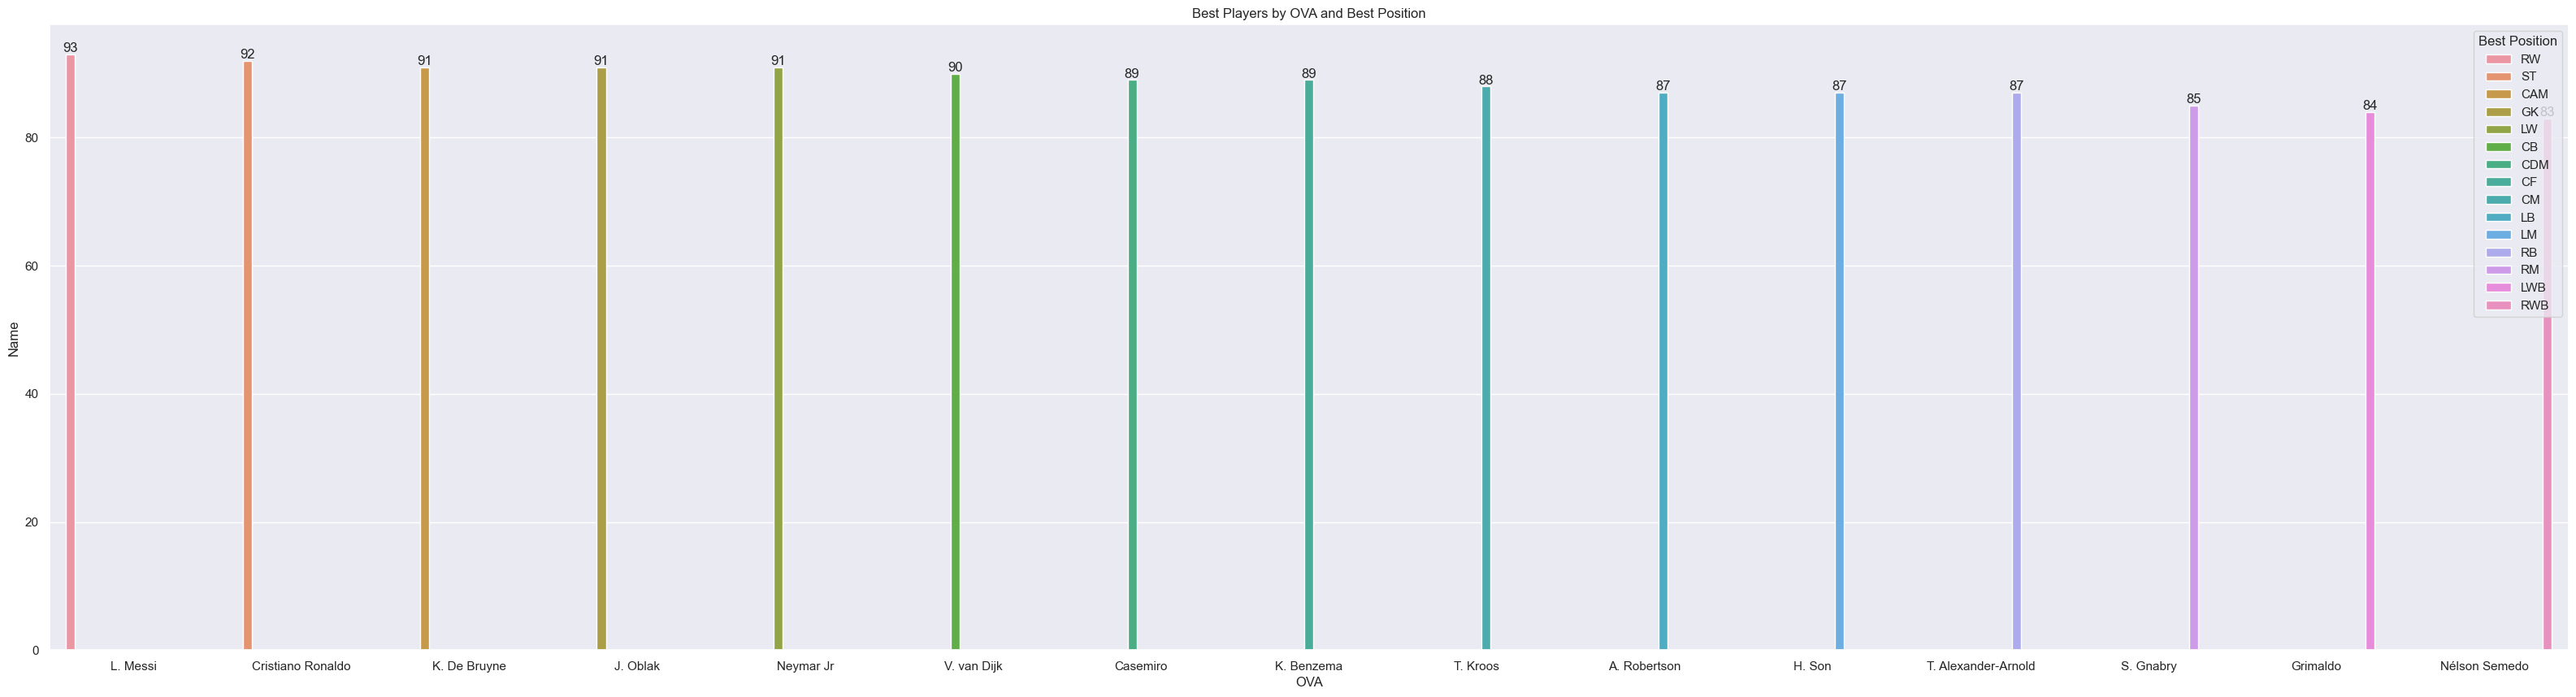

In [255]:
plt.figure(figsize=(40,10))
axx= sns.barplot(y='OVA', x='Name', hue='Best Position',  data=a)
for bars in axx.containers:
    axx.bar_label(bars)
plt.xlabel('OVA')
plt.ylabel('Name')
plt.title('Best Players by OVA and Best Position')
plt.legend(title='Best Position')
plt.show()

#  12. Number of Players by Position

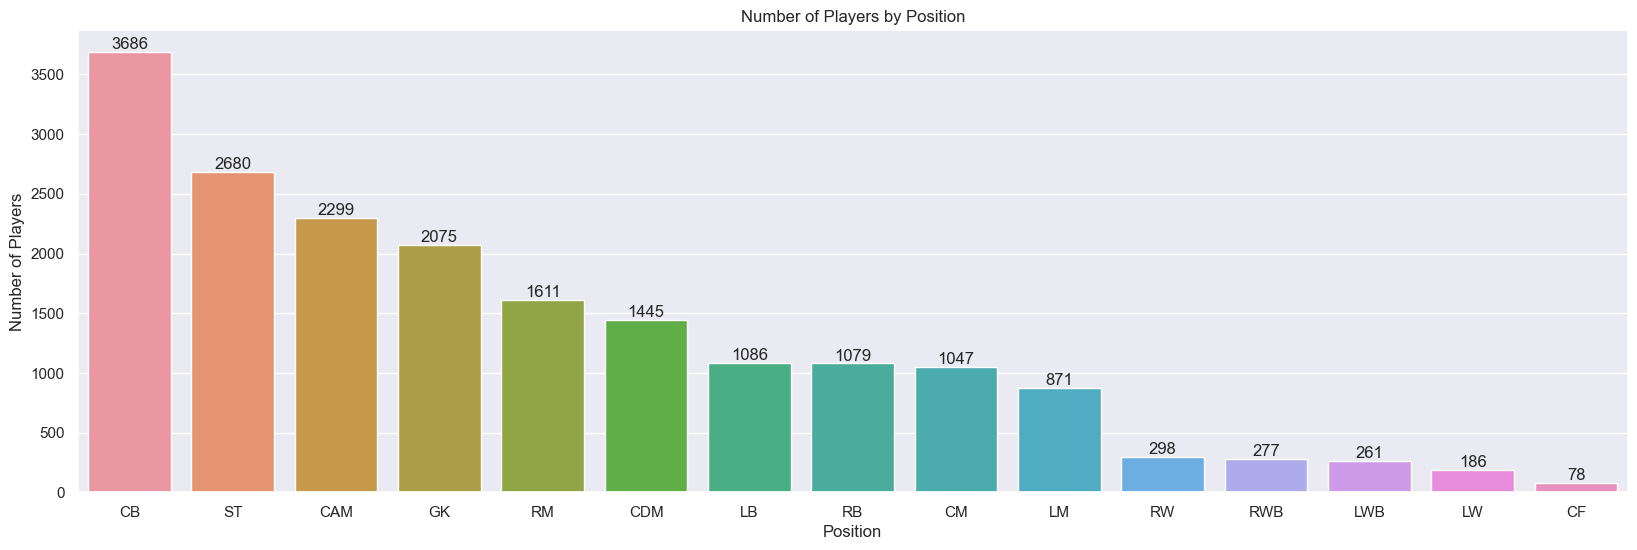

In [274]:
# which position has most players
bb= df['Best Position'].value_counts().to_frame()
plt.figure(figsize=(20,6))

axa= sns.barplot(data=bb, x= bb.index, y='Best Position')
for bars in axa.containers:
    axa.bar_label(bars)

plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.title('Number of Players by Position')

plt.show()


#  13. Player Weight Wise Performance

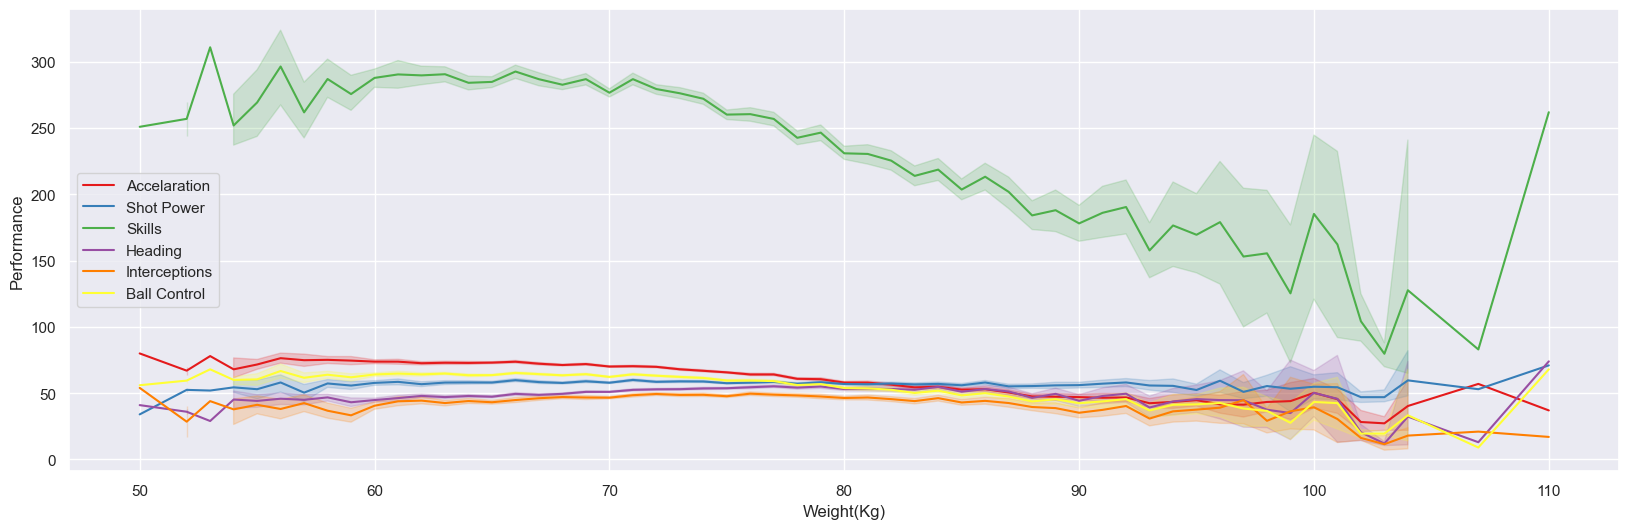

In [222]:
# Set the color palette
sns.set_palette("Set1")

# Create a larger figure
plt.figure(figsize=(20, 6))  # Adjust the width and height as needed

# Create the line plots
sns.lineplot(x='Weight(Kg)', y='Acceleration', data=df, label="Accelaration", legend='brief')
sns.lineplot(x='Weight(Kg)', y='Shot Power', data=df, label="Shot Power", legend='brief')
sns.lineplot(x='Weight(Kg)', y='Skill', data=df, label="Skills", legend='brief')
sns.lineplot(x='Weight(Kg)', y='Heading Accuracy', data=df, label="Heading", legend='brief')
sns.lineplot(x='Weight(Kg)', y='Interceptions', data=df, label="Interceptions", legend='brief')
sns.lineplot(x='Weight(Kg)', y='Ball Control', data=df, label="Ball Control", legend='brief')

# Set the y-axis label
plt.ylabel("Performance")

# Display the plot
plt.show()

#  14. Player Age Wise Performance

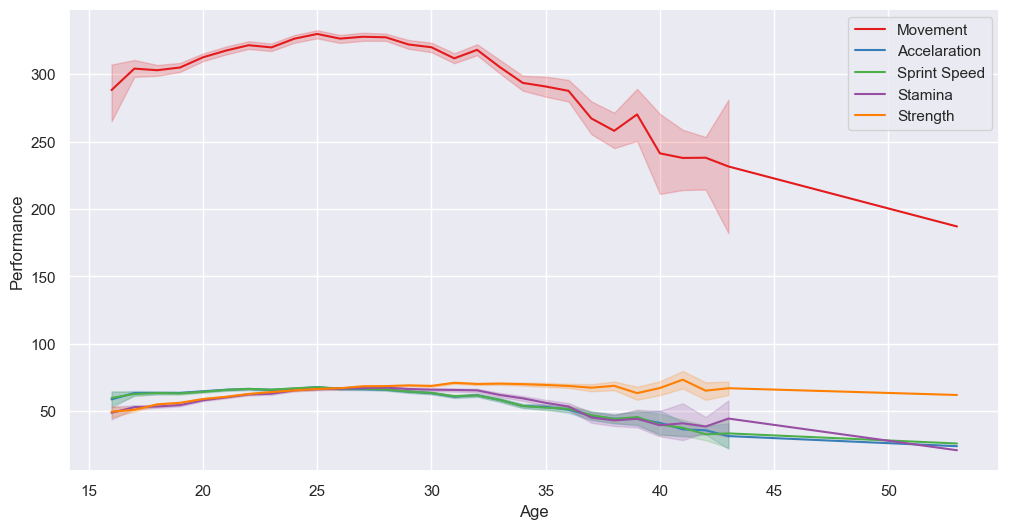

In [225]:
 #Set the color palette
#sns.set_palette("Set1")

# Create a larger figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create the line plots
sns.lineplot(x='Age', y='Movement', data=df, label="Movement", legend='brief')
sns.lineplot(x='Age', y='Acceleration', data=df, label="Accelaration", legend='brief')
sns.lineplot(x='Age', y='Sprint Speed', data=df, label="Sprint Speed", legend='brief')
sns.lineplot(x='Age', y='Stamina', data=df, label="Stamina", legend='brief')
sns.lineplot(x='Age', y='Strength', data=df, label="Strength", legend='brief')

# Set the y-axis label
plt.ylabel("Performance")

# Display the plot
plt.show()

#  15. Player Age Wise Value

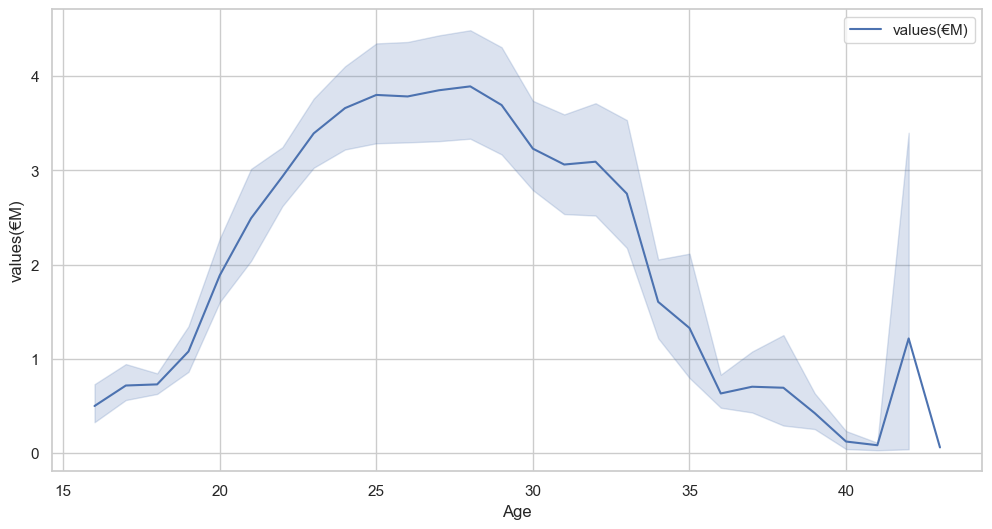

In [131]:
# Create a larger figure
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

sns.lineplot(x='Age', y='values(€M)', data=df, label="values(€M)", legend='brief')

# Set the y-axis label
plt.ylabel("values(€M)")

# Display the plot
plt.show()

#  16. Preferred Foot Wise Comparision

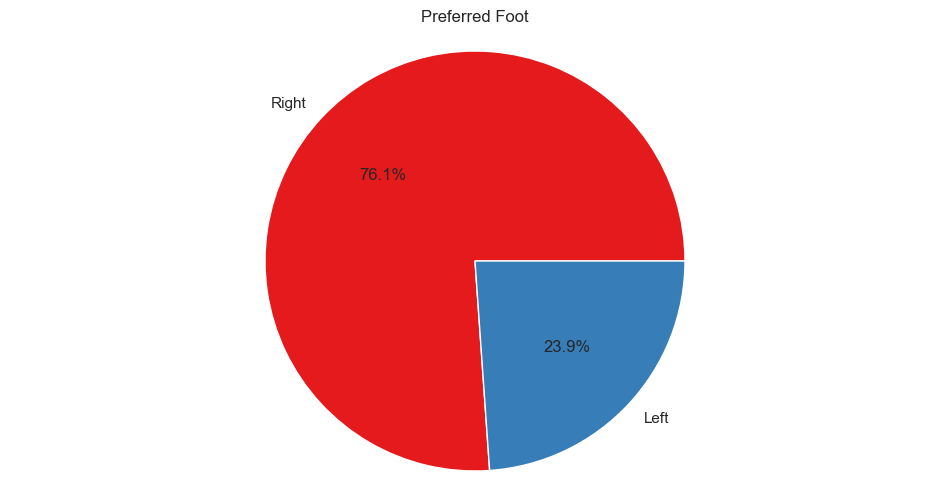

In [230]:
preferred_foot_counts = df['Preferred Foot'].value_counts()
labels = preferred_foot_counts.index
sizes = preferred_foot_counts.values
plt.figure(figsize=(12, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Preferred Foot')
plt.axis('equal')
plt.show()

#  17. Player Position Wise Comparision

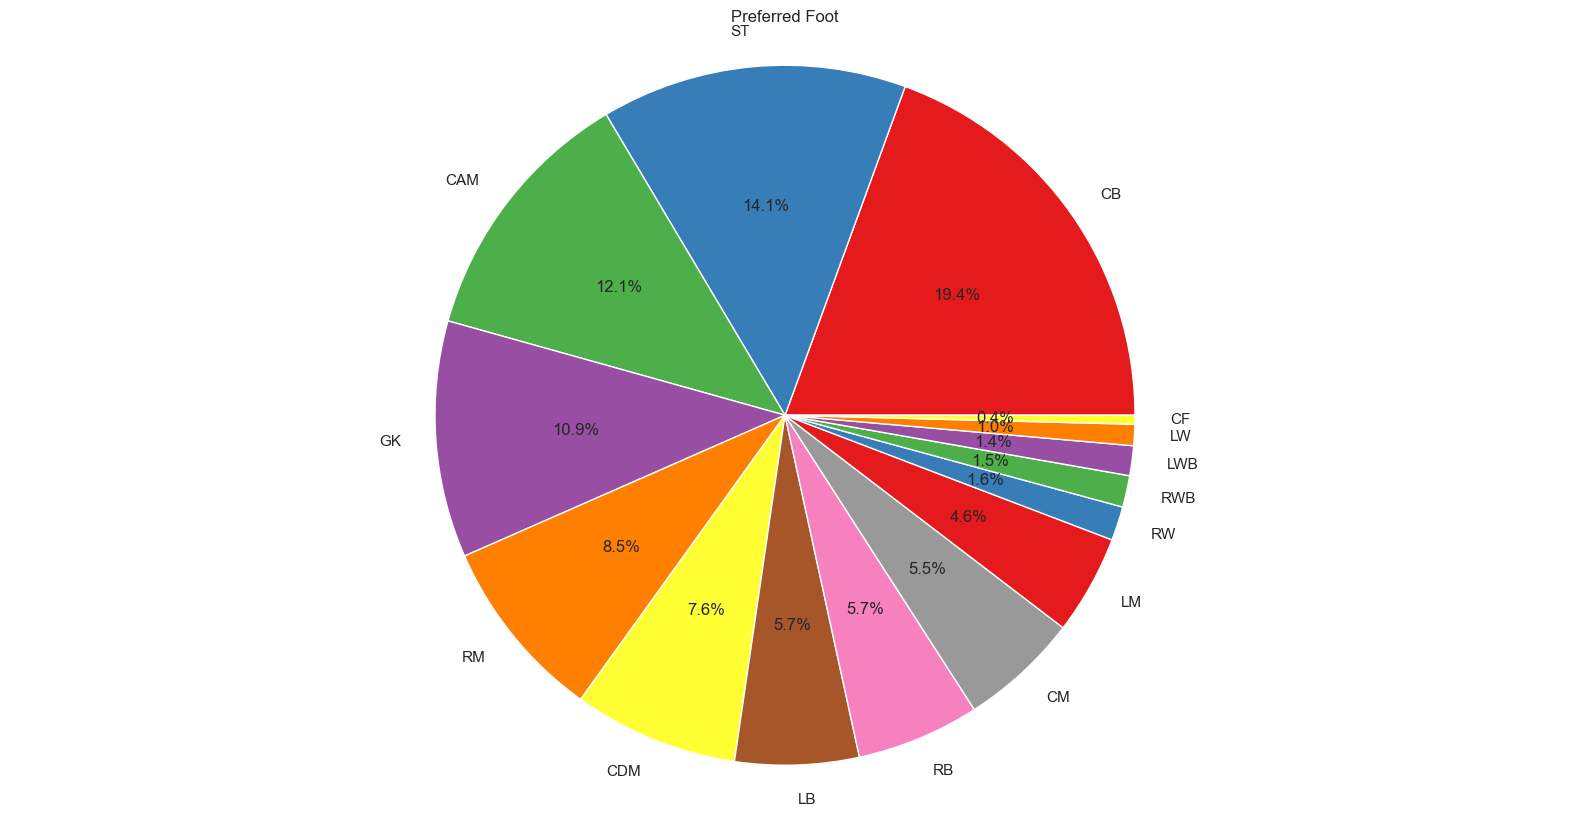

In [234]:
preferred_foot = df['Best Position'].value_counts()
labels = preferred_foot.index
sizes = preferred_foot.values
plt.figure(figsize=(20, 10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Preferred Foot')
plt.axis('equal')
plt.show()

# 18. Number of Players by Their Age

In [132]:
age= df['Age'].value_counts().to_frame()
age.head()

,Age
23,1465
24,1426
22,1421
20,1408
21,1381


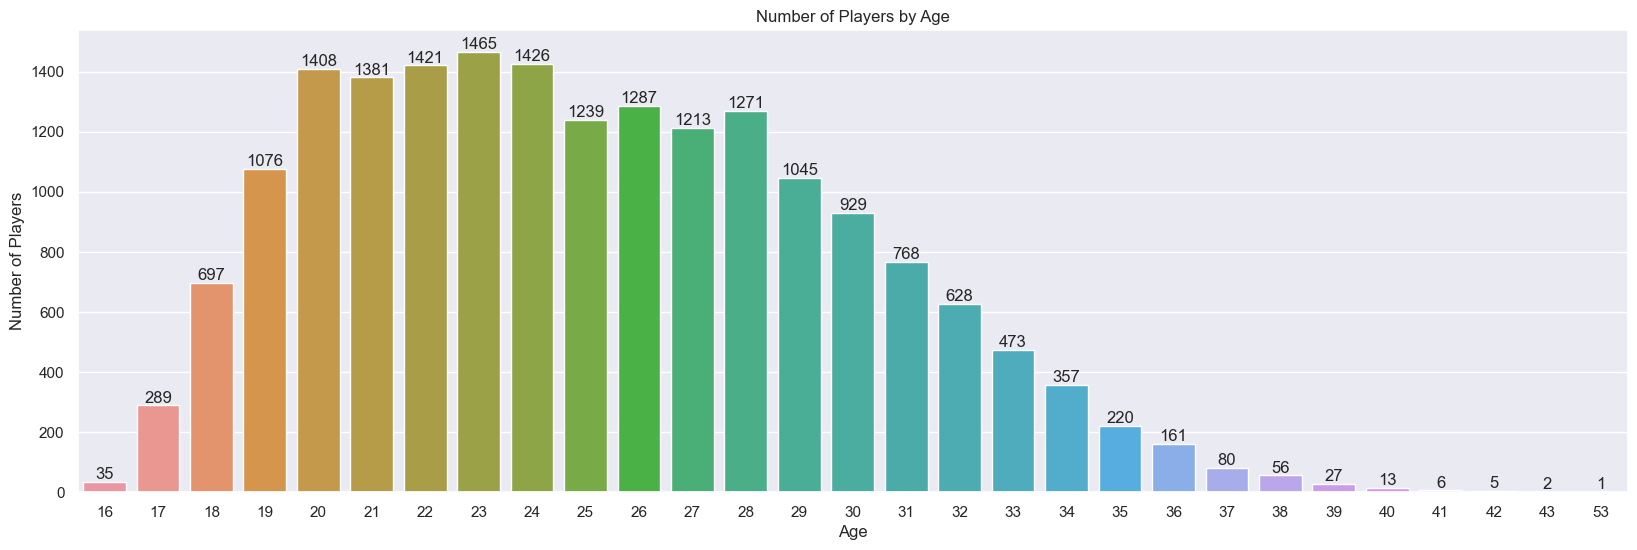

In [254]:
plt.figure(figsize=(20,6))

ax= sns.barplot(data=age, x= age.index, y='Age')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Number of Players by Age')

plt.show()



# 19.  Top 10 Players With Highest Contact Lenght

In [287]:
c=df.sort_values('Contract Length (years)',ascending=False)[['Name','Contract Length (years)']].head(10)
c


,Name,Contract Length (years)
10264,H. Sogahata,23.0
2728,I. Khune,21.0
501,I. Akinfeev,20.0
11053,M. Bloomfield,19.0
9948,D. Lewington,19.0
1784,M. Tekdemir,18.0
14431,D. Zibung,18.0
12967,Yang Sang Min,18.0
4770,Kim Kwang Suk,18.0
3868,Go Yo Han,18.0


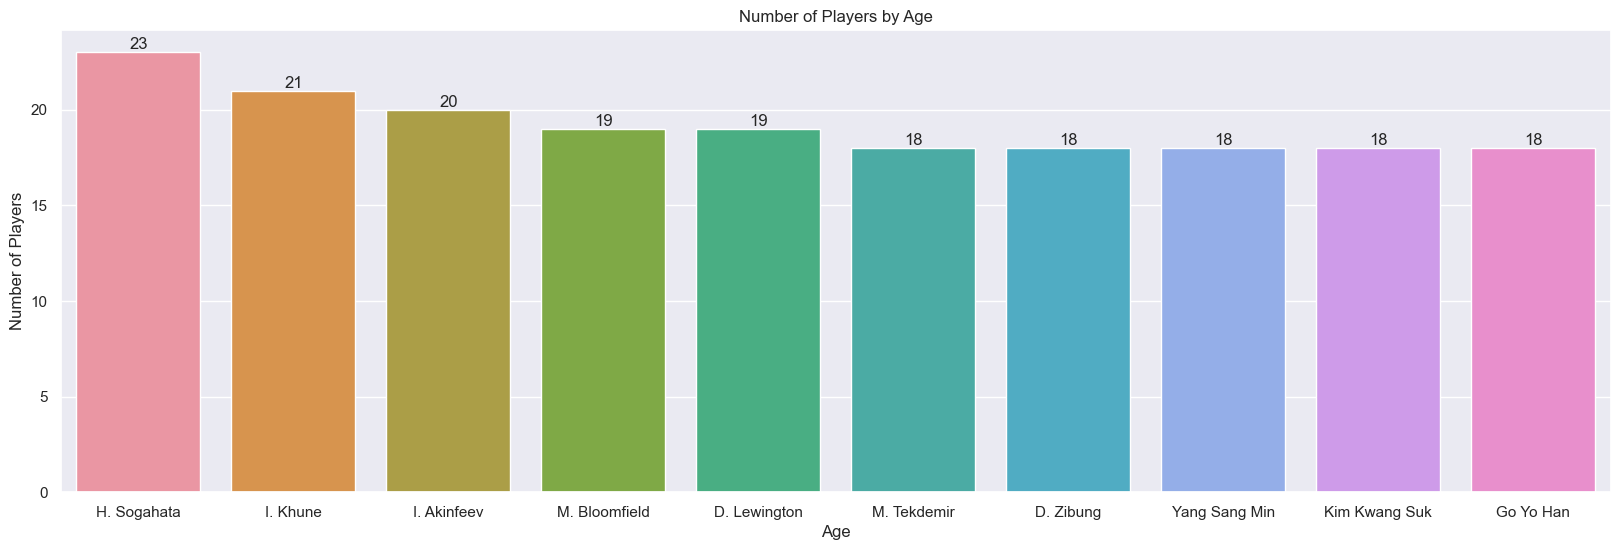

In [286]:
plt.figure(figsize=(20,6))

ax= sns.barplot(data=c, x= 'Name', y='Contract Length (years)')
for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Number of Players by Age')

plt.show()

